In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train = dsets.MNIST(root='', download=True, train=True, transform=transforms.ToTensor())
val = dsets.MNIST(root='', download=True, train=False, transform=transforms.ToTensor())

100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 12559613.34it/s]


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 55111780.63it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|███████████████████████████| 1648877/1648877 [00:00<00:00, 12540124.85it/s]


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 7406892.99it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [12]:
train[0][1]

5

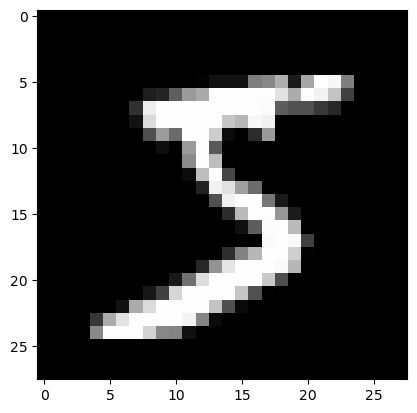

In [18]:
plt.imshow(train[0][0].view(28, 28), cmap='gray')

Text(0.5, 1.0, '0')

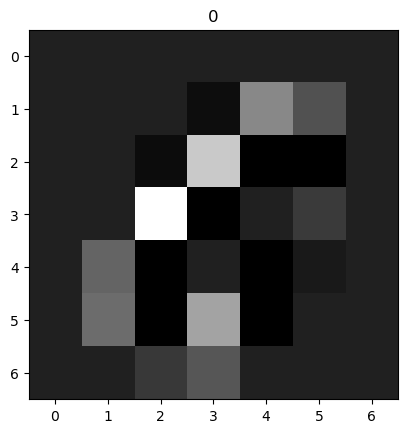

In [184]:
torch.manual_seed(1)
conv = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=1, kernel_size=4, stride=4, padding=1),
    nn.ReLU()
)
num = 1
img = conv(train[num][0])
plt.imshow(img.detach().numpy().reshape(7, 7), cmap='gray')
plt.title(str(train[num][1]))

In [394]:
torch.manual_seed(0)
out = 16
p = 0.55
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=out, kernel_size=5, stride=3),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=1),
    nn.Flatten(1),
    nn.Linear(out* 49, 500),
    nn.ReLU(),
    nn.Dropout(p=p),
    nn.Linear(500, 50),
    nn.ReLU(),
    nn.Dropout(p=p),
    nn.Linear(50, 10)
)

In [395]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.005)

In [396]:
tloader = DataLoader(dataset=train, batch_size=100)
vloader = DataLoader(dataset=val, batch_size=2000)

In [397]:
COST = []
ACCURACY = []

for epoch in range(7):
    
    correct = 0
    total = 0
    
    model.eval()
    for x,y in vloader:
        z = model(x)
        _,yhat = torch.max(z.data, 1)
        correct = correct + (yhat == y).sum().item()
        total += len(y)
        
    
    model.train()    
    for x,y in tloader:
        optimizer.zero_grad()
        z = model(x)
        loss = criterion(z, y)
        COST.append(loss.item())
        loss.backward()
        optimizer.step()
        
    accuracy = correct / total
    ACCURACY.append(accuracy)
    print('percent done: ' + str(epoch) + ' - ' + str(accuracy))

percent done: 0 - 0.0932
percent done: 1 - 0.9728
percent done: 2 - 0.981
percent done: 3 - 0.9806
percent done: 4 - 0.9831
percent done: 5 - 0.9776
percent done: 6 - 0.9835


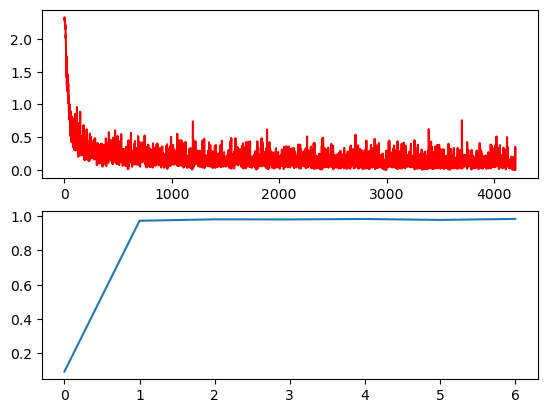

In [402]:
plt.subplot(2, 1, 1)
plt.plot(COST, c='r')
plt.subplot(2, 1, 2)
plt.plot(ACCURACY)
plt.show()